## Paso 1: Carga del conjunto de datos

In [169]:
# Example importing the CSV here

import pandas as pd


dataframe = pd.read_csv('C:/Users/Jaime/Desktop/EUROPEAN MARKET COLLEGE/clase1-minado/INMIGRACION/inmigracion_pais2020_andorra.csv')
dataframe

,Paises,Inmigrantes
0,España,22196
1,Portugal,11534
2,Francia,4194
3,Reino Unido,1135
4,Argentina,734
5,Marruecos,505
6,Italia,492
7,Filipinas,457
8,Alemania,364
9,Países Bajos,262


In [170]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

['Paises']
['Inmigrantes']


## Paso 2: Realiza un EDA completo

In [171]:
# Obtener las dimensiones
dataframe.shape

(19, 2)

In [172]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Paises       19 non-null     object
 1   Inmigrantes  19 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 432.0+ bytes


In [173]:
#Eliminar duplicados
if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates()

In [174]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()

0

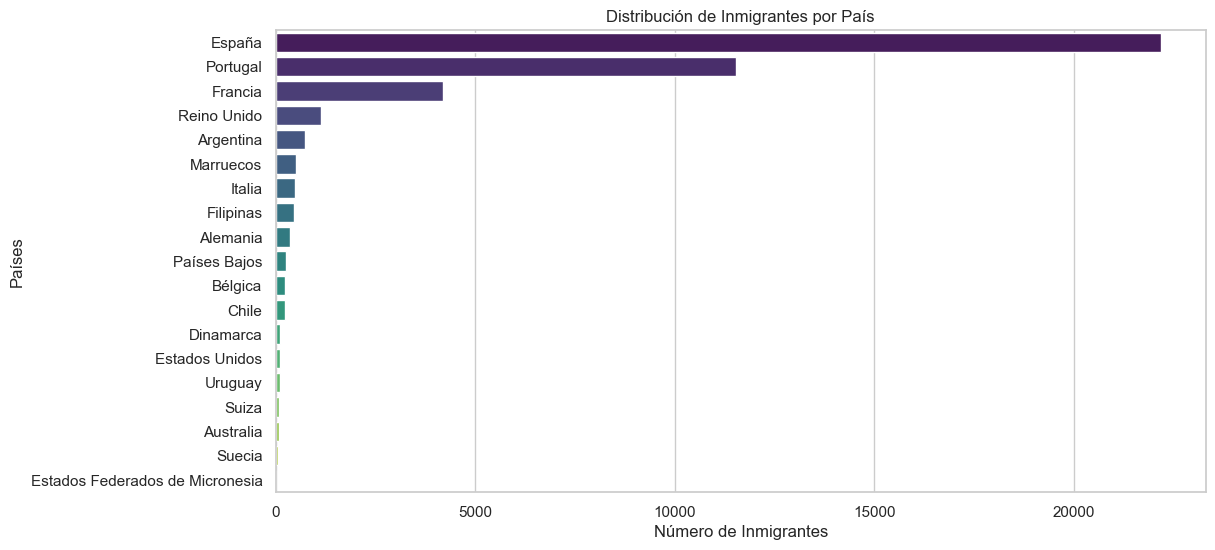

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Inmigrantes', y='Paises', data=dataframe, palette='viridis')

# Añadir etiquetas
plt.title('Distribución de Inmigrantes por País')
plt.xlabel('Número de Inmigrantes')
plt.ylabel('Países')

# Mostrar el gráfico
plt.show()


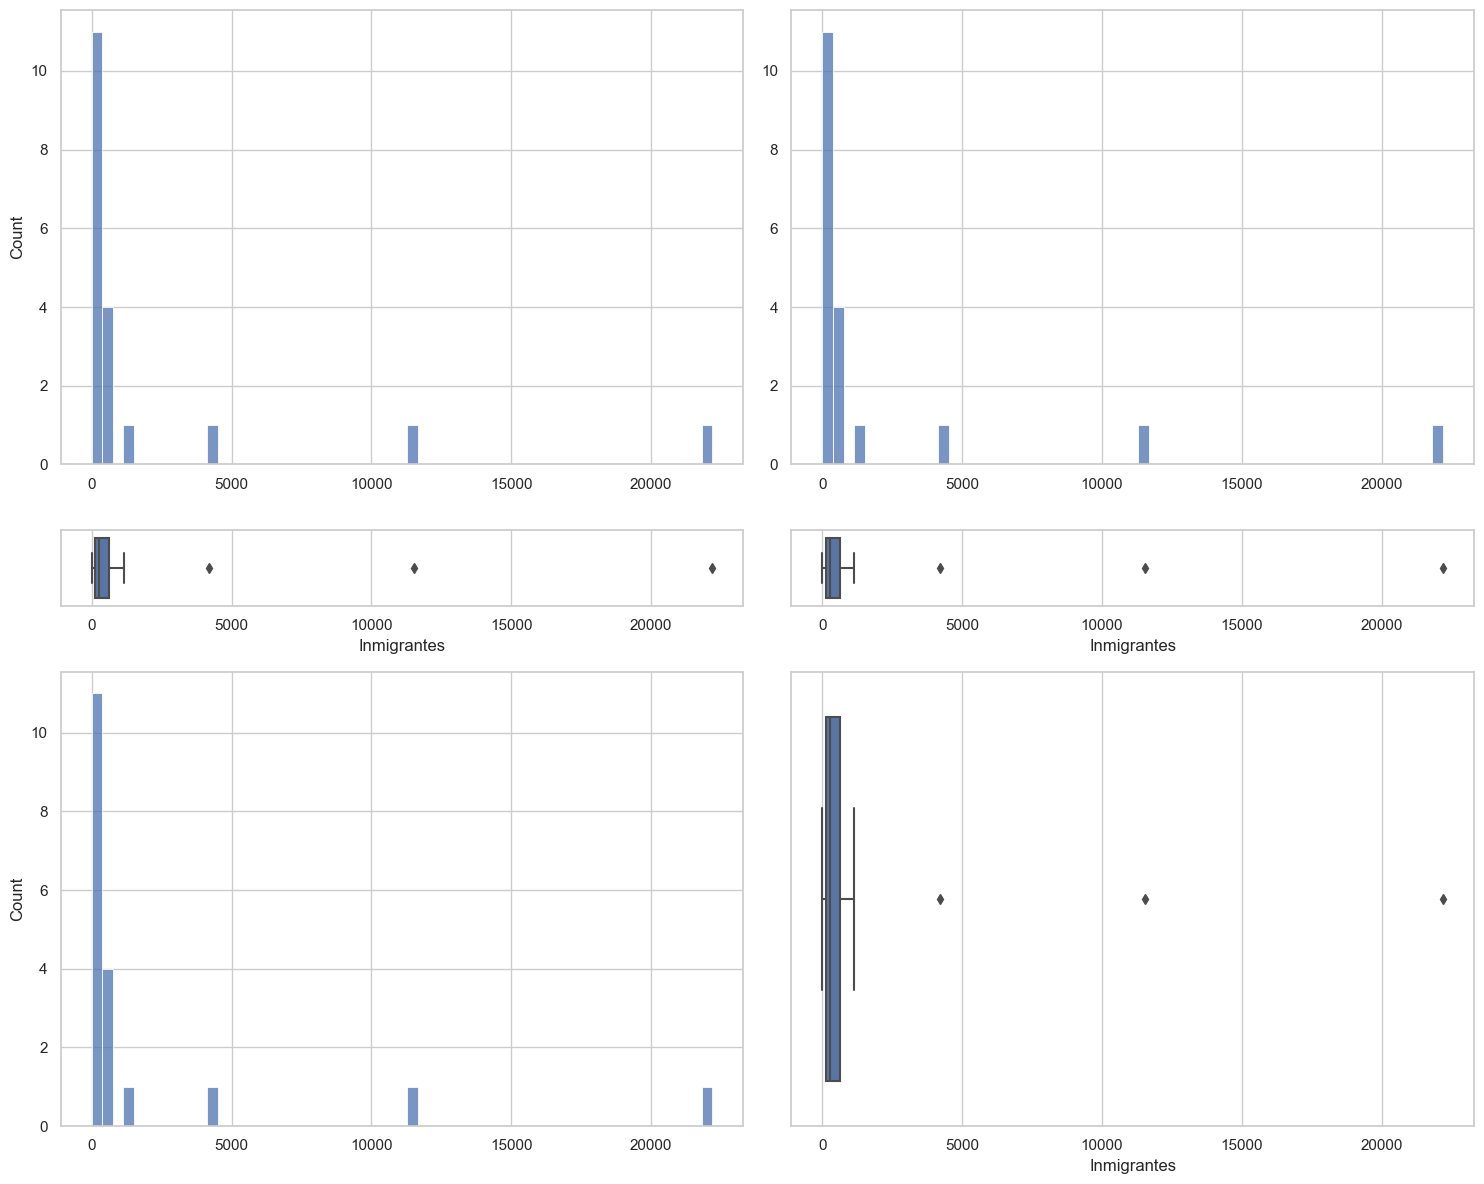

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame se llama df

fig, axis = plt.subplots(3, 2, figsize=(15, 12), gridspec_kw={'height_ratios': [6, 1, 6]})

# Histograma e diagrama de caja para 'Inmigrantes'
sns.histplot(ax=axis[0, 0], data=dataframe, x='Inmigrantes').set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=dataframe, x='Inmigrantes')

# Histograma e diagrama de caja para 'Inmigrantes' (mujeres)
sns.histplot(ax=axis[0, 1], data=dataframe, x='Inmigrantes').set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=dataframe, x='Inmigrantes')

# Histograma e diagrama de caja para 'Inmigrantes' (todos)
sns.histplot(ax=axis[2, 0], data=dataframe, x='Inmigrantes').set(xlabel=None)
sns.boxplot(ax=axis[2, 1], data=dataframe, x='Inmigrantes')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el plot
plt.show()


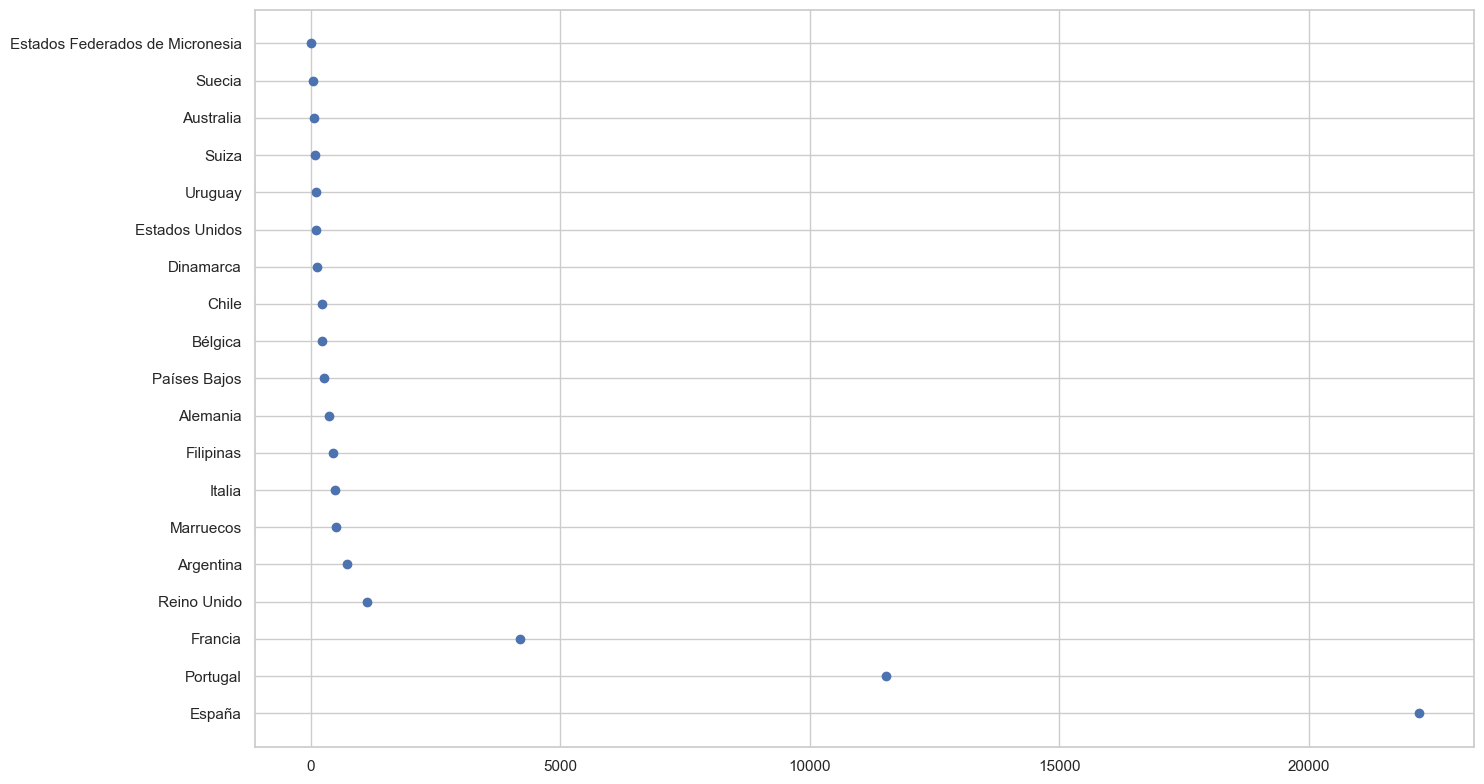

In [177]:
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama df

fig, axis = plt.subplots(1, 1, figsize=(15, 8))

# Diagrama de dispersión para 'Inmigrantes' vs 'Paises'
axis.scatter(dataframe['Inmigrantes'], dataframe['Paises'])

# Ajustar el diseño
plt.tight_layout()

# Mostrar el plot
plt.show()


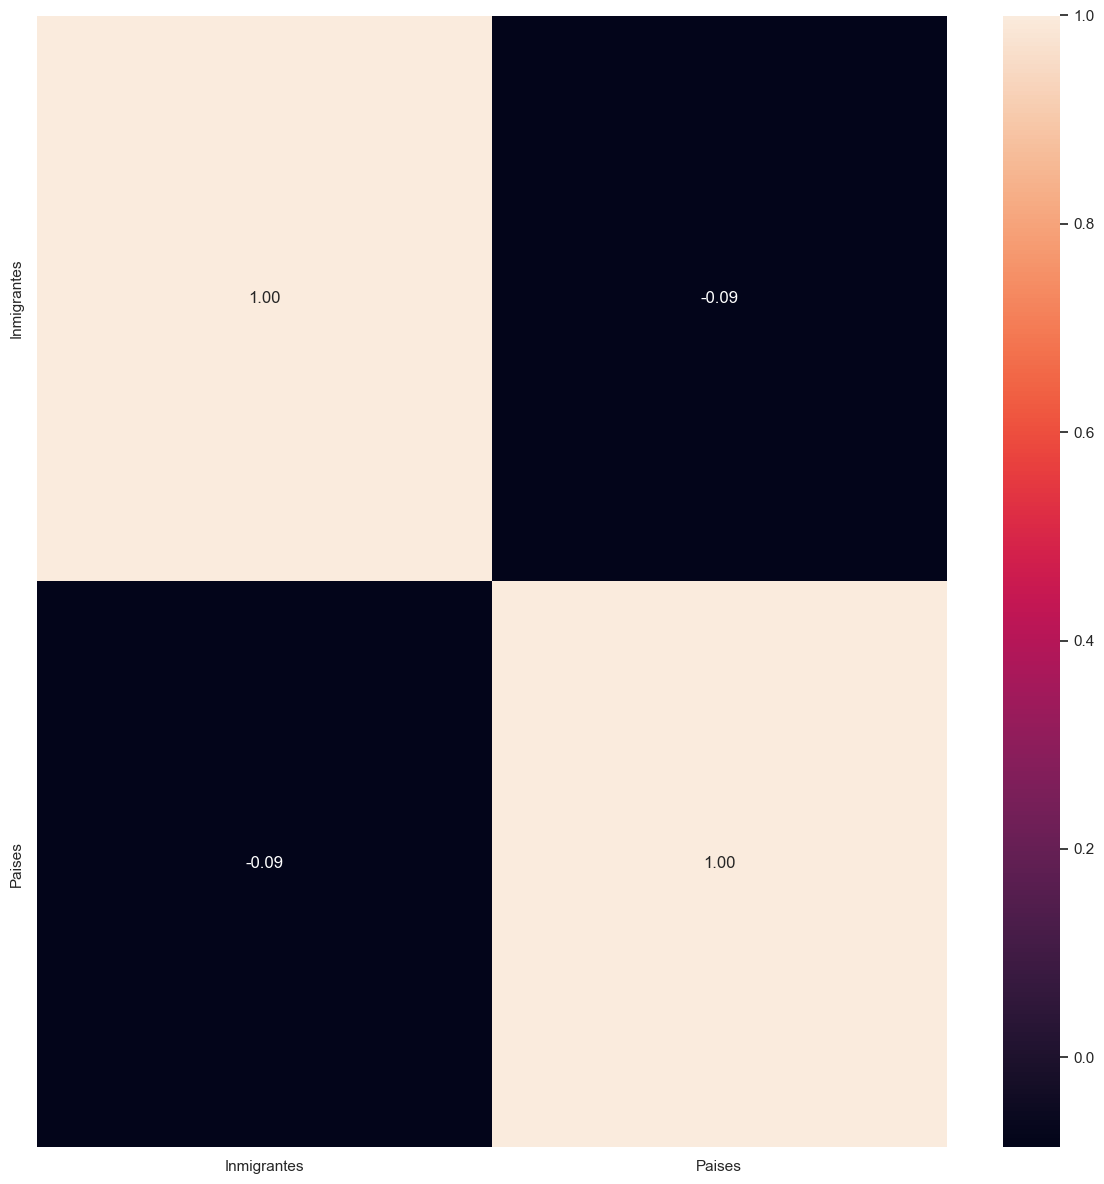

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Supongamos que tu DataFrame se llama df
numeric_variables = ['Inmigrantes', 'Paises']

# Crear una copia del DataFrame para no modificar el original
df_copy = df.copy()

# Utilizar Label Encoding para convertir la columna categórica 'Paises' a numérica
label_encoder = LabelEncoder()
df_copy['Paises'] = label_encoder.fit_transform(df_copy['Paises'])

# Crear una figura de subplots con configuración de 1 fila y 1 columna
fig, axis = plt.subplots(figsize=(12, 12))

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = df_copy[numeric_variables].corr()

# Generar el heatmap de correlaciones
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=axis)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


In [179]:
import plotly.express as px

# Supongamos que tu DataFrame se llama df

# Crear el gráfico de líneas interactivo
fig_line = px.line(dataframe, x='Paises', y=dataframe.columns[1:], # Tomando las columnas desde la tercera en adelante
                   title='Comparación de todas las variables con respecto a inmigrantes a lo largo del tiempo')

# Mostrar el gráfico
fig_line.show()


In [180]:
import plotly.express as px

# Supongamos que tu DataFrame se llama df

# Crear el gráfico de barras apiladas con barmode='group'
fig_bar = px.bar(dataframe, x='Paises', y='Inmigrantes',
                 title='Distribución de Inmigrantes por País',
                 labels={'Inmigrantes': 'Cantidad', 'Paises': 'País'},
                 height=500,
                 color_discrete_sequence=['blue'],
                 barmode='group')  # Utiliza 'group' para barras al lado de la otra

# Mostrar el gráfico
fig_bar.show()


In [181]:
# Guardar el gráfico como archivo HTML
fig_bar.write_html('inmigracion_grafico_barras2020.html')

In [182]:
import plotly.express as px

# Supongamos que tu DataFrame se llama df

# Crear el gráfico de líneas
fig_line = px.line(dataframe, x='Paises', y='Inmigrantes',
                   title='Evolución de la Distribución de Inmigrantes por País',
                   labels={'Inmigrantes': 'Cantidad', 'Paises': 'País'},
                   height=500, line_shape="linear", render_mode="svg")

# Ajustar el eje y con valores específicos

# Mostrar el gráfico
fig_line.show()


In [183]:
import plotly.io as pio


# Guardar el gráfico como un archivo HTML
pio.write_html(fig_line, file='inmigracion_grafico_lineas2020.html')
